**Grupo:**
* Vildoso Flores Dario Alejandro 
* Torres Loayza Alberto Antonio 
* De La Torre Zelaya Daniel German 
* Minto Arze Javier Diego

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
#implementacion del DataSet utilizando la libreria pandas
datos = pd.read_csv('miami-housing.csv')
datos
# PARCELNO: Identificador
# SALE_PRC: Precio ($)
# LND_SQFOOT: Area total (ft2)
# TOT_LVG_AREA: Area de Planta (ft2)
# SPEC_FEAT_VAL: Valor de los agregados (ej., piscinas) ($)
# RAIL_DIST: Distancia al ferrocarril mas cercano (ft)
# OCEAN_DIST: Distancia al oceano mas cercano (ft)
# WATER_DIST: Distancia al lago mas cercano (ft)
# CNTR_DIST: Distancia al centro mas cercano (ft)
# SUBCNTR_DI: Distancia al subcentro mas cercano (ft)
# HWY_DIST: Distancia a la carretera mas cercana (ft)
# age: Edad del edificio
# avno60plus: Variable ficticia que indica si el sonido de los aviones excede un maximo permitido
# structure_quality: Calidad de la estructura
# month_sold: Mes en el que se vendio
# LATITUDE
# LONGITUDE

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,622280070620,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,622280100460,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,622280100470,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,622280100530,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,622280100200,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13927,25.783130,-80.259795,131320040990,275000.0,6780,967,6580,3844.5,20568.0,3252.4,22175.9,12150.1,917.4,16,0,4,4
13928,25.783585,-80.260354,131320040910,340000.0,7500,1854,2544,3593.6,20791.9,3077.7,22375.1,12316.8,738.2,26,0,5,4
13929,25.783793,-80.256126,131320040420,287500.0,8460,1271,2064,4143.2,20307.9,3588.4,20966.9,12433.0,743.7,16,0,7,4
13930,25.784007,-80.257542,131320040330,315000.0,7500,1613,3136,3986.9,20542.6,3589.1,21475.6,12458.0,626.1,16,0,8,4


Ecuación de la normalización media:
$$ x_i = \frac {x_i - \mu_i}{\sigma_i}

In [4]:
def  featureNormalize(X):

    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [5]:
# Leer datos del DataSet
y = datos.values[:, 3]
data, mu, sigma = featureNormalize(datos.values[:, [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 16]])
X = data

#Elegimos los siguientes datos que son influyentes en el precio del inmueble

#LND_SQFOOT: Area total (ft2)
#TOT_LVG_AREA: Area de Planta (ft2)
#SPEC_FEAT_VAL: Valor de los agregados (ej., piscinas) ($)
#RAIL_DIST: Distancia al ferrocarril mas cercano (ft)
#OCEAN_DIST: Distancia al oceano mas cercano (ft)
#WATER_DIST: Distancia al lago mas cercano (ft)
#CNTR_DIST: Distancia al centro mas cercano (ft)
#SUBCNTR_DI: Distancia al subcentro mas cercano (ft)
#HWY_DIST: Distancia a la carretera mas cercana (ft)
#age: Edad del edificio
#structure_quality: Calidad de la estructura

m = y.size  # m = numero de ejemplos de entrenamiento
X = np.column_stack((np.ones(m), X)) # Se añade la fila de unos correspondientes a la primera variable del modelo

pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.124240,-0.374974,-0.688421,-0.895569,-1.073043,-0.973193,-0.802161,-0.152197,1.356321,1.717578,0.442866
1,1.0,0.124240,-0.421685,-0.688421,-0.645771,-1.195979,-0.974014,-0.780616,-0.170324,1.713909,1.528474,0.442866
2,1.0,0.124240,0.267920,2.854008,-0.637063,-1.200202,-0.977425,-0.779819,-0.170856,1.726350,1.433921,0.442866
3,1.0,0.630840,-0.000055,0.033873,-0.609205,-1.223937,-1.002323,-0.771474,-0.166592,1.778074,1.528474,0.442866
4,1.0,0.688502,-0.459791,0.512474,-0.693636,-1.185271,-0.974953,-0.777654,-0.160834,1.677394,0.535674,0.442866
...,...,...,...,...,...,...,...,...,...,...,...,...
13927,1.0,-0.303282,-1.341158,-0.214715,-0.729069,-0.632188,-0.729758,-1.446995,-1.307022,-1.121550,-0.693506,0.442866
13928,1.0,-0.184663,-0.250820,-0.505274,-0.769682,-0.619462,-0.744399,-1.440771,-1.299499,-1.151078,-0.220744,0.442866
13929,1.0,-0.026505,-0.967468,-0.539830,-0.680719,-0.646971,-0.701600,-1.484767,-1.294256,-1.150172,-0.693506,0.442866
13930,1.0,-0.184663,-0.547068,-0.462655,-0.706019,-0.633631,-0.701541,-1.468874,-1.293128,-1.169550,-0.693506,0.442866


In [6]:
pd.DataFrame(y)

,0
0,440000.0
1,349000.0
2,800000.0
3,988000.0
4,755000.0
...,...
13927,275000.0
13928,340000.0
13929,287500.0
13930,315000.0


# Usando el metodo de Gradiente Descendente:

Ecuación del costo:
$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$
Ecuación del error porcentual:
$$ e = \frac{1}{m} \sum_{i=1}^m \left(\frac {|h_{\theta}(x^{(i)}) - y^{(i)}|}{y^{(i)}}\right)*100

In [7]:
def calcularCosto(X, y, theta):
    # inicializa algunos valores importantes
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(h - y))

    # calcular el promedio porcentual del error
    error_porcentual = np.mean(np.abs((h - y) / y)) * 100
    return J, error_porcentual

Ecuación del descenso de gradiente:
$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad

In [8]:
J, e = calcularCosto(X, y, theta=np.zeros(12))
print('Con thetas = 0 \n Costo calculado = %.2f' % J)

# pruebas adicionales de la función de costes
J, e = calcularCosto(X, y, theta=np.full(12, 0.5))
print('Con thetas = 0.5 \n Costo calculado = %.2f' % J)

J, e = calcularCosto(X, y, theta=np.full(12, 0.6))
print('Con thetas = 0.6 \n Costo calculado = %.2f' % J)

J, e = calcularCosto(X, y, theta=np.full(12, 0.7))
print('Con thetas = 0.7 \n Costo calculado = %.2f' % J)

J, e = calcularCosto(X, y, theta=np.full(12, 0.8))
print('Con thetas = 0.8 \n Costo calculado = %.2f' % J)

J, e = calcularCosto(X, y, theta=np.full(12, 0.75))
print('Con thetas = 0.75 \n Costo calculado = %.2f' % J)

Con thetas = 0 
 Costo calculado = 130285740900.07
Con thetas = 0.5 
 Costo calculado = 130285398314.38
Con thetas = 0.6 
 Costo calculado = 130285329797.82
Con thetas = 0.7 
 Costo calculado = 130285261281.46
Con thetas = 0.8 
 Costo calculado = 130285192765.30
Con thetas = 0.75 
 Costo calculado = 130285227023.36


In [9]:
def gradientDescent(X, y, theta, alpha, num_iters):
        # Inicializa algunos valores importantes
    m = y.shape[0]  # numero de ejemplos de entrenamiento

    # hace una copia de theta, para evitar cambiar la matriz original,
    # ya que las matrices numpy se pasan por referencia a las funciones

    theta = theta.copy()

    J_history = [] # Lista que se utiliza para almacenar el costo en cada iteración
    E_history = [] # Lista que se utiliza para almacenar el error porcentual de cada iteracion
    j = 0
    for i in range(num_iters):
        # print(theta)
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        # save the cost J in every iteration
        # print("Costo calculado: ", calcularCosto(X, y, theta))
        j, e = calcularCosto(X, y, theta)
        J_history.append(j)
        E_history.append(e)

    return theta, J_history, E_history
# inicializa los parametros de ajuste
theta = np.full(12, .75)

# configuraciones para el descenso por el gradiente
iterations = 1000
alpha = 0.01

theta, J_history, E_history = gradientDescent(X ,y, theta, alpha, iterations)
# print('Theta encontrada por descenso gradiente: {:.4f}, {:.4f}'.format(*theta))
print('Theta encontrada por descenso gradiente:', theta)
# print('Valores theta esperados (aproximadamente): [-3.6303, 1.1664]')
print('Calculo del costo:', J_history)
print('Calculo del error:', E_history)

Theta encontrada por descenso gradiente: [399924.66578017  15809.18914117 157401.12490586  40762.98822837
  29454.46529352 -67619.09981988 -15636.7819232  -73445.26128869
 -25437.27486864  30135.18244069 -39208.21565013  66759.2785247 ]
Calculo del costo: [np.float64(127350831040.24306), np.float64(124506379365.97618), np.float64(121748583909.92575), np.float64(119074294469.70471), np.float64(116480492395.61638), np.float64(113964284564.03758), np.float64(111522897644.02658), np.float64(109153672642.27084), np.float64(106854059712.27219), np.float64(104621613214.40308), np.float64(102453987014.16982), np.float64(100348930006.67699), np.float64(98304281855.91556), np.float64(96317968938.08823), np.float64(94388000478.74629), np.float64(92512464874.04367), np.float64(90689526186.91495), np.float64(88917420809.46083), np.float64(87194454283.27391), np.float64(85518998269.86403), np.float64(83889487663.74661), np.float64(82304417841.1385), np.float64(80762342037.56908), np.float64(79261868

Text(0, 0.5, 'Costo J')

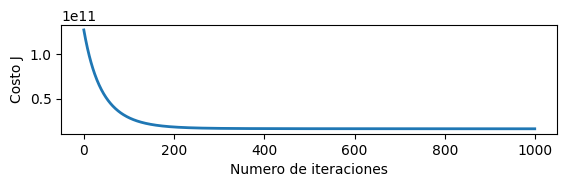

In [10]:
# Grafica la convergencia del costo
ax = plt.subplot(313)
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Numero de iteraciones')
plt.ylabel('Costo J')

Datos de prueba:

In [14]:
test = [1, 10000, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 23, 4]
test[1:] = (test[1:] - mu )/ sigma
price = np.dot(test, theta)
price

494355.5651095712

# Usando el metodo de la Normal:

In [15]:
# Nuevamente cargamos los datos sin normalizar
y = datos.values[:, 3]
X = datos.values[:, [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 16]]
X = np.column_stack((np.ones(X.shape[0]), X))
X

array([[1.00000e+00, 9.37500e+03, 1.75300e+03, ..., 1.59549e+04,
        6.70000e+01, 4.00000e+00],
       [1.00000e+00, 9.37500e+03, 1.71500e+03, ..., 1.81250e+04,
        6.30000e+01, 4.00000e+00],
       [1.00000e+00, 9.37500e+03, 2.27600e+03, ..., 1.82005e+04,
        6.10000e+01, 4.00000e+00],
       ...,
       [1.00000e+00, 8.46000e+03, 1.27100e+03, ..., 7.43700e+02,
        1.60000e+01, 4.00000e+00],
       [1.00000e+00, 7.50000e+03, 1.61300e+03, ..., 6.26100e+02,
        1.60000e+01, 4.00000e+00],
       [1.00000e+00, 8.83300e+03, 1.86700e+03, ..., 4.74700e+02,
        6.20000e+01, 4.00000e+00]])

Ecuacion de la Normal:
$$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$

In [16]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta
theta = normalEqn(X, y)
theta

array([ 8.07636683e+04,  3.07101730e+00,  1.94265171e+02,  2.93855974e+00,
        4.87480617e+00, -4.70169347e+00,  4.08864568e-01, -3.31132549e+00,
        1.30576913e-01,  4.51942885e+00, -1.98550437e+03,  6.13610978e+04])

In [17]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y)

# Estimar el precio con los datos de prueba
test = [1, 10000, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 23, 4]
price = np.dot(test, theta)
price


526457.4064543988